In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
example = pd.DataFrame({'Car': ['Bugatti', 'Bugatti','Koenigsegg ', 'Koenigsegg '],
                        'Top Speed': [408.47, 431.072, 447.19, 447.2]})
example

,Car,Top Speed
0,Bugatti,408.470
1,Bugatti,431.072
2,Koenigsegg,447.190
3,Koenigsegg,447.200


In [3]:
example.groupby(['Car']).mean()

,Top Speed
Car,
Bugatti,419.771
Koenigsegg,447.195


From the result, we can see that the process is group the car model then compute the mean values of top speed of each car model.

In [4]:
# use another real data set
!wget "http://files.grouplens.org/datasets/movielens/ml-100k.zip"
!unzip ml-100k.zip
!ls

--2020-03-27 16:42:33--  http://files.grouplens.org/datasets/movielens/ml-100k.zip
Resolving files.grouplens.org (files.grouplens.org)... 128.101.65.152
Connecting to files.grouplens.org (files.grouplens.org)|128.101.65.152|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4924029 (4.7M) [application/zip]
Saving to: ‘ml-100k.zip’

ml-100k.zip         100%[===================>]   4.70M  5.69MB/s    in 0.8s    

2020-03-27 16:42:34 (5.69 MB/s) - ‘ml-100k.zip’ saved [4924029/4924029]

Archive:  ml-100k.zip
   creating: ml-100k/
  inflating: ml-100k/allbut.pl       
  inflating: ml-100k/mku.sh          
  inflating: ml-100k/README          
  inflating: ml-100k/u.data          
  inflating: ml-100k/u.genre         
  inflating: ml-100k/u.info          
  inflating: ml-100k/u.item          
  inflating: ml-100k/u.occupation    
  inflating: ml-100k/u.user          
  inflating: ml-100k/u1.base         
  inflating: ml-100k/u1.test         
  inflating: ml-100k/u2.base

In [5]:
df = pd.read_csv("ml-100k/u.info")
df

,943 users
0,1682 items
1,100000 ratings


In [6]:
data = pd.read_csv("ml-100k/u.data", sep='\t',names="userId,movieId,rating,timestamp".split(",")) 
data

,userId,movieId,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596
...,...,...,...,...
99995,880,476,3,880175444
99996,716,204,5,879795543
99997,276,1090,1,874795795
99998,13,225,2,882399156


We now would like to know how many users had rate on the movies. We can use `groupby()` from pandas.

In [9]:
check_by_movieId = data.groupby('movieId').count()
check_by_movieId

,userId,rating,timestamp
movieId,,,
1,452,452,452
2,131,131,131
3,90,90,90
4,209,209,209
5,86,86,86
...,...,...,...
1678,1,1,1
1679,1,1,1
1680,1,1,1


In [10]:
check_by_movie_userId = data.groupby('movieId')['userId'].count()
check_by_movie_userId

movieId
1       452
2       131
3        90
4       209
5        86
       ... 
1678      1
1679      1
1680      1
1681      1
1682      1
Name: userId, Length: 1682, dtype: int64

In [11]:
# the reset_index() is to have it back as a dataframe
table1 = data.groupby('movieId')['userId'].count().reset_index(name='userIdCount')
table1

,movieId,userIdCount
0,1,452
1,2,131
2,3,90
3,4,209
4,5,86
...,...,...
1677,1678,1
1678,1679,1
1679,1680,1
1680,1681,1


If want to make sure that no userId voted more than once, we can also use `nunique()`

In [12]:
table2 = data.groupby('movieId')['userId'].nunique().reset_index(name='userIdCount')
table2

,movieId,userIdCount
0,1,452
1,2,131
2,3,90
3,4,209
4,5,86
...,...,...
1677,1678,1
1678,1679,1
1679,1680,1
1680,1681,1


In [36]:
# check for total rating on specific movieId
number_rated_5 = pd.DataFrame(table1['movieId']).eq(5, axis=1)
number_rated_5

,movieId
0,False
1,False
2,False
3,False
4,True
...,...
1677,False
1678,False
1679,False
1680,False


In [40]:
number_rated = sum(table1.loc[table1['movieId'].eq(5)]['userIdCount'])
number_rated

86

In [0]:
def check_rating(movieid):
  x = sum(table1.loc[table1['movieId'].eq(movieid)]['userIdCount'])
  return x

In [44]:
# check the number of rating for movieId 1
check_rating(1)

452

In [45]:
x = table1['userIdCount']
x

0       452
1       131
2        90
3       209
4        86
       ... 
1677      1
1678      1
1679      1
1680      1
1681      1
Name: userIdCount, Length: 1682, dtype: int64

In [46]:
table1.shape[0]

1682

(array([141.,   0.,  68., ...,   0.,   0.,   1.]),
 array([  1.        ,   1.34601665,   1.69203329, ..., 582.30796671,
        582.65398335, 583.        ]),
 <a list of 1682 Patch objects>)

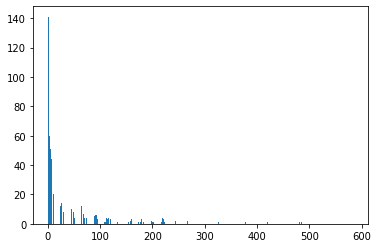

In [47]:
n_bins = table1.shape[0]

plt.hist(x,bins=n_bins)

(array([1.146e+03, 2.490e+02, 1.390e+02, 6.700e+01, 3.800e+01, 2.400e+01,
        7.000e+00, 5.000e+00, 6.000e+00, 1.000e+00]),
 array([  1. ,  59.2, 117.4, 175.6, 233.8, 292. , 350.2, 408.4, 466.6,
        524.8, 583. ]),
 <a list of 10 Patch objects>)

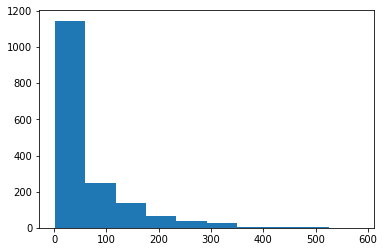

In [48]:
plt.hist(x,bins=10)